# Convergence of upper and lower bound over time

Note that the events in the plot are only based on the upper bound iterations.

In [1]:
import pandas as pd

data = pd.read_json("./05_clean_data.json.zip")
# data = data.drop_duplicates(subset=["instance"])
data

num_vars  num_clauses baseline_alg baseline_alg_conf  runtime_baseline  \
0          16           13         YASA        t2_m1_null             0.202   
1          28           39         YASA        t2_m1_null             0.214   
2         119          346         YASA        t2_m1_null             0.302   
3          28           40         YASA        t2_m1_null             0.213   
4          46          244         YASA        t2_m1_null             0.253   
..        ...          ...          ...               ...               ...   
225       557         4992         YASA        t2_m1_null             2.509   
226        39           77         YASA        t2_m1_null             0.227   
227        96          183         YASA        t2_m1_null             0.258   
228       326          499         YASA        t2_m1_null             0.487   
229       272         1670         YASA        t2_m1_null             1.274   

     baseline_sample_size                  path_to_baseline_sample  \
0                      10   2023-03-01_13-51-03/5_1_7_1_sample.csv   
1                      12  2023-03-01_13-51-03/11_1_7_1_sample.csv   
2                      22  2023-03-01_13-51-03/20_1_7_4_sample.csv   
3                      15  2023-03-01_13-51-03/12_1_7_1_sample.csv   
4                      38  2023-03-01_13-51-03/15_1_7_5_sample.csv   
..                    ...                                      ...   
225                   398  2023-03-01_13-51-03/33_1_7_5_sample.csv   
226                    17  2023-03-01_13-51-03/14_1_7_1_sample.csv   
227                    17  2023-03-01_13-51-03/18_1_7_5_sample.csv   
228                    22  2023-03-01_13-51-03/28_1_7_5_sample.csv   
229                   369  2023-03-01_13-51-03/27_1_7_1_sample.csv   

                                            parameters  \
0    {'func': 'run_samplns', 'args': {'instance_nam...   
1    {'func': 'run_samplns', 'args': {'instance_nam...   
2    {'func': 'run_samplns', 'args': {'instance_nam...   
3    {'func': 'run_samplns', 'args': {'instance_nam...   
4    {'func': 'run_samplns', 'args': {'instance_nam...   
..                                                 ...   
225  {'func': 'run_samplns', 'args': {'instance_nam...   
226  {'func': 'run_samplns', 'args': {'instance_nam...   
227  {'func': 'run_samplns', 'args': {'instance_nam...   
228  {'func': 'run_samplns', 'args': {'instance_nam...   
229  {'func': 'run_samplns', 'args': {'instance_nam...   

                  instance_name  lower_bound  upper_bound  \
0    toybox_2006-10-31_23-30-06            8            8   
1                      TightVNC            8            8   
2                   berkeleyDB2           11           12   
3                     APL-Model            8            8   
4                          dell           31           31   
..                          ...          ...          ...   
225               fs_2017-05-22          396          396   
226                 SortingLine            9            9   
227                       axTLS           10           11   
228                      E-Shop            8           12   
229  uclibc_2020-12-24_11-54-53          365          365   

                                        iteration_info  time_used_by_yasa  \
0    [{'nbrhd_tuples': 232, 'nbrhd_confs': 8, 'iter...              0.202   
1    [{'nbrhd_tuples': 249, 'nbrhd_confs': 9, 'iter...              0.214   
2    [{'nbrhd_tuples': 198, 'nbrhd_confs': 6, 'iter...              0.302   
3    [{'nbrhd_tuples': 242, 'nbrhd_confs': 10, 'ite...              0.213   
4    [{'nbrhd_tuples': 246, 'nbrhd_confs': 22, 'ite...              0.253   
..                                                 ...                ...   
225  [{'nbrhd_tuples': 0, 'nbrhd_confs': 0, 'iterat...              2.509   
226  [{'nbrhd_tuples': 202, 'nbrhd_confs': 11, 'ite...              0.227   
227  [{'nbrhd_tuples': 163, 'nbrhd_confs': 7, 'iter...              0.258   
228  [{'nbrhd_t

In [2]:
from _conf import EXTERNAL_BOUNDS

best_lower_bound = (
    data.groupby(["instance_name"])["lower_bound"]
    .max()
    .reset_index()
    .rename(columns={"lower_bound": "best_lower_bound"})
)
best_lower_bound.to_json("./out/07_best_lower_bounds.json.zip")
best_lower_bound["internal_best_lower_bound"] = best_lower_bound["best_lower_bound"]
external_best_lb = (
    pd.concat([pd.read_csv(p) for p in EXTERNAL_BOUNDS])
    .groupby(["instance_name"])["best_lower_bound"]
    .max()
    .reset_index()
)
best_lower_bound = (
    pd.concat([best_lower_bound, external_best_lb])
    .groupby(["instance_name"])[["best_lower_bound", "internal_best_lower_bound"]]
    .max()
    .reset_index()
)
best_lower_bound

instance_name  best_lower_bound  internal_best_lower_bound
0                           APL                 7                        7.0
1                     APL-Model                 8                        8.0
2               BankingSoftware                28                       28.0
3                 BattleofTanks               256                      256.0
4                    ChatClient                 7                        7.0
5                          DMIE                16                       16.0
6                        E-Shop                10                        8.0
7                    EMBToolkit              1872                     1872.0
8                        FameDB                 8                        8.0
9                    FeatureIDE                 7                        7.0
10                FreeBSD-8_0_0                30                       30.0
11                          PPU                12                       12.0
12                     SafeBali                11                       11.0
13                  SortingLine                 9                        9.0
14                     TightVNC                 8                        8.0
15                       Violet                15                       15.0
16            WaterlooGenerated                82                       82.0
17                     XSEngine                32                       32.0
18                     aaed2000                51                       51.0
19                     am31_sim                29                       28.0
20             atlas_mips32_4kc                33                       33.0
21                        axTLS                10                       10.0
22                  berkeleyDB1                15                       15.0
23                  berkeleyDB2                12                       11.0
24               busybox-1_18_0                13                       12.0
25               busybox-1_29_2                20                       19.0
26  busybox_2007-01-24_09-14-09                21                       21.0
27  busybox_2020-12-16_21-53-05                18                       18.0
28                    calculate                 5                        5.0
29                          car                 5                        5.0
30                         dell                31                       31.0
31              eCos-3-0_i386pc                33                       33.0
32                       ea2468                32                       31.0
33                        email                 6                        6.0
34   fiasco_2017-09-26_11-30-56               225                      225.0
35   fiasco_2020-12-01_14-09-14               196                      196.0
36           financial_services              4304                     4304.0
37                fs_2017-05-22               396                      396.0
38                          gpl                16                       16.0
39              integrator_arm7                32                       32.0
40                          lcm                 6                        6.0
41  soletta_2015-06-26_18-38-56                24                       24.0
42   toybox_2006-10-31_23-30-06                 8                        8.0
43   toybox_2020-12-06_00-02-46                 8                        7.0
44   uclibc_2008-06-05_13-46-47               505                      505.0
45   uclibc_2020-12-24_11-54-53               365                      365.0

## Extend the data by some additional information on the best values

In [3]:
# Find the best values for each instance as reference.

# add them to the data as reference
data = data.merge(best_lower_bound, left_on="instance_name", right_on="instance_name")
data

num_vars  num_clauses baseline_alg baseline_alg_conf  runtime_baseline  \
0          16           13         YASA        t2_m1_null             0.202   
1          16           13         YASA        t2_m1_null             0.207   
2          16           13         YASA        t2_m1_null             0.184   
3          16           13         YASA        t2_m1_null             0.206   
4          16           13         YASA        t2_m1_null             0.187   
..        ...          ...          ...               ...               ...   
225        10           17         YASA        t2_m1_null             0.199   
226        10           17         YASA        t2_m1_null             0.200   
227        10           17         YASA        t2_m1_null             0.202   
228        10           17         YASA        t2_m1_null             0.197   
229        10           17         YASA        t2_m1_null             0.199   

     baseline_sample_size                 path_to_baseline_sample  \
0                      10  2023-03-01_13-51-03/5_1_7_1_sample.csv   
1                      10  2023-03-01_13-51-03/5_1_7_4_sample.csv   
2                      10  2023-03-01_13-51-03/5_1_7_2_sample.csv   
3                      10  2023-03-01_13-51-03/5_1_7_3_sample.csv   
4                      10  2023-03-01_13-51-03/5_1_7_5_sample.csv   
..                    ...                                     ...   
225                     7  2023-03-01_13-51-03/3_1_7_5_sample.csv   
226                     7  2023-03-01_13-51-03/3_1_7_3_sample.csv   
227                     7  2023-03-01_13-51-03/3_1_7_4_sample.csv   
228                     7  2023-03-01_13-51-03/3_1_7_1_sample.csv   
229                     7  2023-03-01_13-51-03/3_1_7_2_sample.csv   

                                            parameters  \
0    {'func': 'run_samplns', 'args': {'instance_nam...   
1    {'func': 'run_samplns', 'args': {'instance_nam...   
2    {'func': 'run_samplns', 'args': {'instance_nam...   
3    {'func': 'run_samplns', 'args': {'instance_nam...   
4    {'func': 'run_samplns', 'args': {'instance_nam...   
..                                                 ...   
225  {'func': 'run_samplns', 'args': {'instance_nam...   
226  {'func': 'run_samplns', 'args': {'instance_nam...   
227  {'func': 'run_samplns', 'args': {'instance_nam...   
228  {'func': 'run_samplns', 'args': {'instance_nam...   
229  {'func': 'run_samplns', 'args': {'instance_nam...   

                  instance_name  lower_bound  upper_bound  \
0    toybox_2006-10-31_23-30-06            8            8   
1    toybox_2006-10-31_23-30-06            8            8   
2    toybox_2006-10-31_23-30-06            8            8   
3    toybox_2006-10-31_23-30-06            8            8   
4    toybox_2006-10-31_23-30-06            8            8   
..                          ...          ...          ...   
225                       email            6            6   
226                       email            6            6   
227                       email            6            6   
228                       email            6            6   
229                       email            6            6   

                                        iteration_info  time_used_by_yasa  \
0    [{'nbrhd_tuples': 232, 'nbrhd_confs': 8, 'iter...              0.202   
1    [{'nbrhd_tuples': 187, 'nbrhd_confs': 7, 'iter...              0.207   
2    [{'nbrhd_tuples': 179, 'nbrhd_confs': 7, 'iter...              0.184   
3    [{'nbrhd_tuples': 151, 'nbrhd_confs': 7, 'iter...              0.206   
4    [{'nbrhd_tuples': 193, 'nbrhd_confs': 7, 'iter...              0.187   
..                                                 ...                ...   
225  [{'nbrhd_tuples': 70, 'nbrhd_confs': 7, 'itera...              0.199   
226  [{'nbrhd_tuples': 70, 'nbrhd_confs': 7, 'itera...              0.200   
227  [{'nbrhd_tuples': 70, 'nbrhd_confs': 7, 'itera...              0.202   
228  [{'nbrhd_tuples': 70, 

## A look onto the data never hurts

In [4]:
data

num_vars  num_clauses baseline_alg baseline_alg_conf  runtime_baseline  \
0          16           13         YASA        t2_m1_null             0.202   
1          16           13         YASA        t2_m1_null             0.207   
2          16           13         YASA        t2_m1_null             0.184   
3          16           13         YASA        t2_m1_null             0.206   
4          16           13         YASA        t2_m1_null             0.187   
..        ...          ...          ...               ...               ...   
225        10           17         YASA        t2_m1_null             0.199   
226        10           17         YASA        t2_m1_null             0.200   
227        10           17         YASA        t2_m1_null             0.202   
228        10           17         YASA        t2_m1_null             0.197   
229        10           17         YASA        t2_m1_null             0.199   

     baseline_sample_size                 path_to_baseline_sample  \
0                      10  2023-03-01_13-51-03/5_1_7_1_sample.csv   
1                      10  2023-03-01_13-51-03/5_1_7_4_sample.csv   
2                      10  2023-03-01_13-51-03/5_1_7_2_sample.csv   
3                      10  2023-03-01_13-51-03/5_1_7_3_sample.csv   
4                      10  2023-03-01_13-51-03/5_1_7_5_sample.csv   
..                    ...                                     ...   
225                     7  2023-03-01_13-51-03/3_1_7_5_sample.csv   
226                     7  2023-03-01_13-51-03/3_1_7_3_sample.csv   
227                     7  2023-03-01_13-51-03/3_1_7_4_sample.csv   
228                     7  2023-03-01_13-51-03/3_1_7_1_sample.csv   
229                     7  2023-03-01_13-51-03/3_1_7_2_sample.csv   

                                            parameters  \
0    {'func': 'run_samplns', 'args': {'instance_nam...   
1    {'func': 'run_samplns', 'args': {'instance_nam...   
2    {'func': 'run_samplns', 'args': {'instance_nam...   
3    {'func': 'run_samplns', 'args': {'instance_nam...   
4    {'func': 'run_samplns', 'args': {'instance_nam...   
..                                                 ...   
225  {'func': 'run_samplns', 'args': {'instance_nam...   
226  {'func': 'run_samplns', 'args': {'instance_nam...   
227  {'func': 'run_samplns', 'args': {'instance_nam...   
228  {'func': 'run_samplns', 'args': {'instance_nam...   
229  {'func': 'run_samplns', 'args': {'instance_nam...   

                  instance_name  lower_bound  upper_bound  \
0    toybox_2006-10-31_23-30-06            8            8   
1    toybox_2006-10-31_23-30-06            8            8   
2    toybox_2006-10-31_23-30-06            8            8   
3    toybox_2006-10-31_23-30-06            8            8   
4    toybox_2006-10-31_23-30-06            8            8   
..                          ...          ...          ...   
225                       email            6            6   
226                       email            6            6   
227                       email            6            6   
228                       email            6            6   
229                       email            6            6   

                                        iteration_info  time_used_by_yasa  \
0    [{'nbrhd_tuples': 232, 'nbrhd_confs': 8, 'iter...              0.202   
1    [{'nbrhd_tuples': 187, 'nbrhd_confs': 7, 'iter...              0.207   
2    [{'nbrhd_tuples': 179, 'nbrhd_confs': 7, 'iter...              0.184   
3    [{'nbrhd_tuples': 151, 'nbrhd_confs': 7, 'iter...              0.206   
4    [{'nbrhd_tuples': 193, 'nbrhd_confs': 7, 'iter...              0.187   
..                                                 ...                ...   
225  [{'nbrhd_tuples': 70, 'nbrhd_confs': 7, 'itera...              0.199   
226  [{'nbrhd_tuples': 70, 'nbrhd_confs': 7, 'itera...              0.200   
227  [{'nbrhd_tuples': 70, 'nbrhd_confs': 7, 'itera...              0.202   
228  [{'nbrhd_tuples': 70, 

The data field `iteration_info` contains a list of dicts for each iteration. This dict looks as follows:
```
{ 'nbrhd_tuples': 166,  # the tuples to be covered in this iteration
  'nbrhd_confs': 5,     # the number of configurations deleted from the sample
  'iteration': 0,       # the number of the iteration, in this case the first iteration
  'lb': 3.0,            # the current best lb (global)
  'ub': 23,             # the current best ub (global)
  'time': 1.0297019481658936,    # overall time at the end of this iteration
  'iteration_time': 0.48791050910949707,   # time in this iteration
  'events': [[0.0350489616394043, 'neighborhood_selected'],   # times of events in this iteration. Good for finding the culprit of long runtimes.
   [0.24133801460266113, 'local_cds_computed'],
   [0.29517436027526855, 'model_built'],
   [0.48662543296813965, 'model_optimized'],
   [0.48789548873901367, 'neighborhood_optimized'],
   [0.48791003227233887, 'global_lb_iteration_finished']]}
```

In [5]:
instance_infos = (
    data[["instance_name", "num_vars", "num_clauses"]]
    .drop_duplicates()
    .sort_values(by=["num_vars", "num_clauses"])
)
instance_infos

instance_name  num_vars  num_clauses
185                    calculate         9           15
195                          lcm         9           16
225                        email        10           17
75                    ChatClient        14           20
0     toybox_2006-10-31_23-30-06        16           13
90                           car        16           33
170                   FeatureIDE        19           27
85                        FameDB        22           40
150                          APL        23           35
210                     SafeBali        24           45
5                       TightVNC        28           39
15                     APL-Model        28           40
35                           gpl        38           99
60                   SortingLine        39           77
20                          dell        46          244
95                           PPU        52          109
155                  berkeleyDB1        76          147
70                         axTLS        96          183
220                       Violet       101          203
10                   berkeleyDB2       119          346
130  soletta_2015-06-26_18-38-56       129          192
180                BattleofTanks       144          769
160              BankingSoftware       176          280
100   fiasco_2017-09-26_11-30-56       230         1181
105   fiasco_2020-12-01_14-09-14       258         1542
165   uclibc_2008-06-05_13-46-47       263         1699
175   uclibc_2020-12-24_11-54-53       272         1670
115                       E-Shop       326          499
135   toybox_2020-12-06_00-02-46       334           92
145                         DMIE       366          627
140  busybox_2007-01-24_09-14-09       540          429
50                 fs_2017-05-22       557         4992
215            WaterlooGenerated       580          879
25            financial_services       771         7238
40                busybox-1_18_0       854         1164
55                busybox-1_29_2      1018          997
190  busybox_2020-12-16_21-53-05      1050          996
65                      am31_sim      1178         2747
30                    EMBToolkit      1179         5414
120             atlas_mips32_4kc      1229         2875
80               eCos-3-0_i386pc      1245         3723
205              integrator_arm7      1272         2980
110                     XSEngine      1273         2942
45                      aaed2000      1298         3036
200                FreeBSD-8_0_0      1397        15692
125                       ea2468      1408         3319

## Extract the iteration data from each optimization

Bring them in a format that can easily be plotted by seaborn.

In [6]:
import pandas as pd


# Collect the data from the iteration_info events.
class EventCollector:
    def __init__(self):
        self.events = {
            "time": [],
            "val": [],
            "type": [],
            "instance": [],
            "path": [],
            # "alg": [],
            "initial_sample_size": [],
            "y": [],
            "final": [],
        }

    def __call__(self, row):
        print(row)
        it_data = row["iteration_info"]

        def add(val, lbub, time, final=False):
            self.events["time"].append(time / 60)
            self.events["val"].append(val)
            self.events["type"].append(lbub)
            self.events["instance"].append(row["instance_name"])
            # self.events["alg"].append(row["baseline_alg"])
            self.events["path"].append(row["path_to_baseline_sample"])
            self.events["initial_sample_size"].append(row["baseline_sample_size"])
            self.events["y"].append(100 * (val / row["best_lower_bound"]))
            self.events["final"].append(final)

        # add a zero entry
        add(0, "Lower", 0)
        add(row["baseline_sample_size"], "Upper", 0)
        for event in it_data:
            add(
                event["lb"],
                "Lower",
                event["time"],
                final=event["lb"] == row["lower_bound"],
            )
            add(
                event["ub"],
                "Upper",
                event["time"],
                final=event["ub"] == row["upper_bound"],
            )


ec = EventCollector()
data.sort_values(by=["num_vars", "num_clauses"]).apply(ec, axis=1)
t = pd.DataFrame(ec.events)

num_vars                                                                     9
num_clauses                                                                 15
baseline_alg                                                              YASA
baseline_alg_conf                                                   t2_m1_null
runtime_baseline                                                         0.214
baseline_sample_size                                                        10
path_to_baseline_sample                 2023-03-01_13-51-03/1_1_7_1_sample.csv
parameters                   {'func': 'run_samplns', 'args': {'instance_nam...
instance_name                                                        calculate
lower_bound                                                                  5
upper_bound                                                                  5
iteration_info               [{'nbrhd_tuples': 38, 'nbrhd_confs': 10, 'iter...
time_used_by_yasa                                   

num_vars                                                                   144
num_clauses                                                                769
baseline_alg                                                              YASA
baseline_alg_conf                                                   t2_m1_null
runtime_baseline                                                          0.59
baseline_sample_size                                                       454
path_to_baseline_sample                2023-03-01_13-51-03/22_1_7_2_sample.csv
parameters                   {'func': 'run_samplns', 'args': {'instance_nam...
instance_name                                                    BattleofTanks
lower_bound                                                                256
upper_bound                                                                313
iteration_info               [{'nbrhd_tuples': 245, 'nbrhd_confs': 79, 'ite...
time_used_by_yasa                                   

In [7]:
t

time   val   type   instance  \
0       0.000000   0.0  Lower  calculate   
1       0.000000  10.0  Upper  calculate   
2       0.000892   5.0  Lower  calculate   
3       0.000892   5.0  Upper  calculate   
4       0.000000   0.0  Lower  calculate   
...          ...   ...    ...        ...   
28705  58.104998  43.0  Upper     ea2468   
28706  58.808391  28.0  Lower     ea2468   
28707  58.808391  43.0  Upper     ea2468   
28708  59.980794  28.0  Lower     ea2468   
28709  59.980794  43.0  Upper     ea2468   

                                          path  initial_sample_size        y  \
0       2023-03-01_13-51-03/1_1_7_1_sample.csv                   10    0.000   
1       2023-03-01_13-51-03/1_1_7_1_sample.csv                   10  200.000   
2       2023-03-01_13-51-03/1_1_7_1_sample.csv                   10  100.000   
3       2023-03-01_13-51-03/1_1_7_1_sample.csv                   10  100.000   
4       2023-03-01_13-51-03/1_1_7_4_sample.csv                   10    0.000   
...                                        ...                  ...      ...   
28705  2023-03-01_13-51-03/47_1_7_5_sample.csv                   72  134.375   
28706  2023-03-01_13-51-03/47_1_7_5_sample.csv                   72   87.500   
28707  2023-03-01_13-51-03/47_1_7_5_sample.csv                   72  134.375   
28708  2023-03-01_13-51-03/47_1_7_5_sample.csv                   72   87.500   
28709  2023-03-01_13-51-03/47_1_7_5_sample.csv                   72  134.375   

       final  
0      False  
1      False  
2       True  
3       True  
4      False  
...      ...  
28705   True  
28706   True  
28707   True  
28708   True  
28709   True  

[28710 rows x 8 columns]

## Feature Models on which SampLNS did not finish a single iteration in time

These models have very large initial samples (more than a thousand configurations), for which the current implementation is not equipped.
The problem lies more in the data structures than the actual approach.
They should be feasible with some extra effort in making those data structures more efficient.

*A lower bound is still computed for these instances, but without iterations of SampLNS, only the final lower bound is saved after SampLNS aborted.*

In [8]:
t_ = t.groupby(["instance", "path"])["time"].max().reset_index()
unsolved_instances = t_[t_["time"] == 0]["instance"].unique().tolist()
unsolved_instances

[]

## Plot the convergence for all other models.

In [9]:
solved_instances = [
    x for x in instance_infos["instance_name"].tolist() if x not in unsolved_instances
]

In [10]:
# Prepare plotting
import seaborn as sns

sns.set_theme()
import matplotlib.pyplot as plt

In [11]:
def plot_lb_ub_progress(data, axis, xmax=16, single_instance=False):
    instance_descr = "Model"
    bound_descr = "Bound"
    t_ = data.rename(columns={"instance": instance_descr, "type": bound_descr})
    if single_instance:
        sns.lineplot(
            data=t_,
            ax=axis,
            x="time",
            y="y",
            style=bound_descr,
            hue="path",
            units="path",
            estimator=None,
            markers=False,
            palette="tab10",
            drawstyle="steps-post",
            dashes=[(1.5, 1.5), (3, 3)],
            legend=False,
        )
        sns.scatterplot(
            data=t_[t_[bound_descr] == "Upper"],
            ax=axis,
            x="time",
            y="y",
            hue="path",
            marker="X",
            palette="tab10",
            legend=False,
        )
    else:
        sns.lineplot(
            data=t_,
            ax=axis,
            x="time",
            y="y",
            style=bound_descr,
            hue=instance_descr,
            units="path",
            estimator=None,
            markers=False,
            palette="tab10",
            drawstyle="steps-post",
            dashes=[(1.5, 1.5), (3, 3)],
        )
        sns.scatterplot(
            data=t_[t_[bound_descr] == "Upper"],
            ax=axis,
            x="time",
            y="y",
            hue=instance_descr,
            marker="X",
            palette="tab10",
            legend=False,
        )
    axis.set_xlim(-0.1, xmax)
    axis.set_xlabel("Time in (min)")
    axis.set_ylabel("Relative to best lower bound (%)")
    if single_instance:
        axis.set_title(
            f"Convergence of upper and lower bound - {data['instance'].tolist()[0]}"
        )
    else:
        axis.set_title("Convergence of upper and lower bound")

### All models in one plot

This shows us that most models really make quick progress and only a few take a little longer.

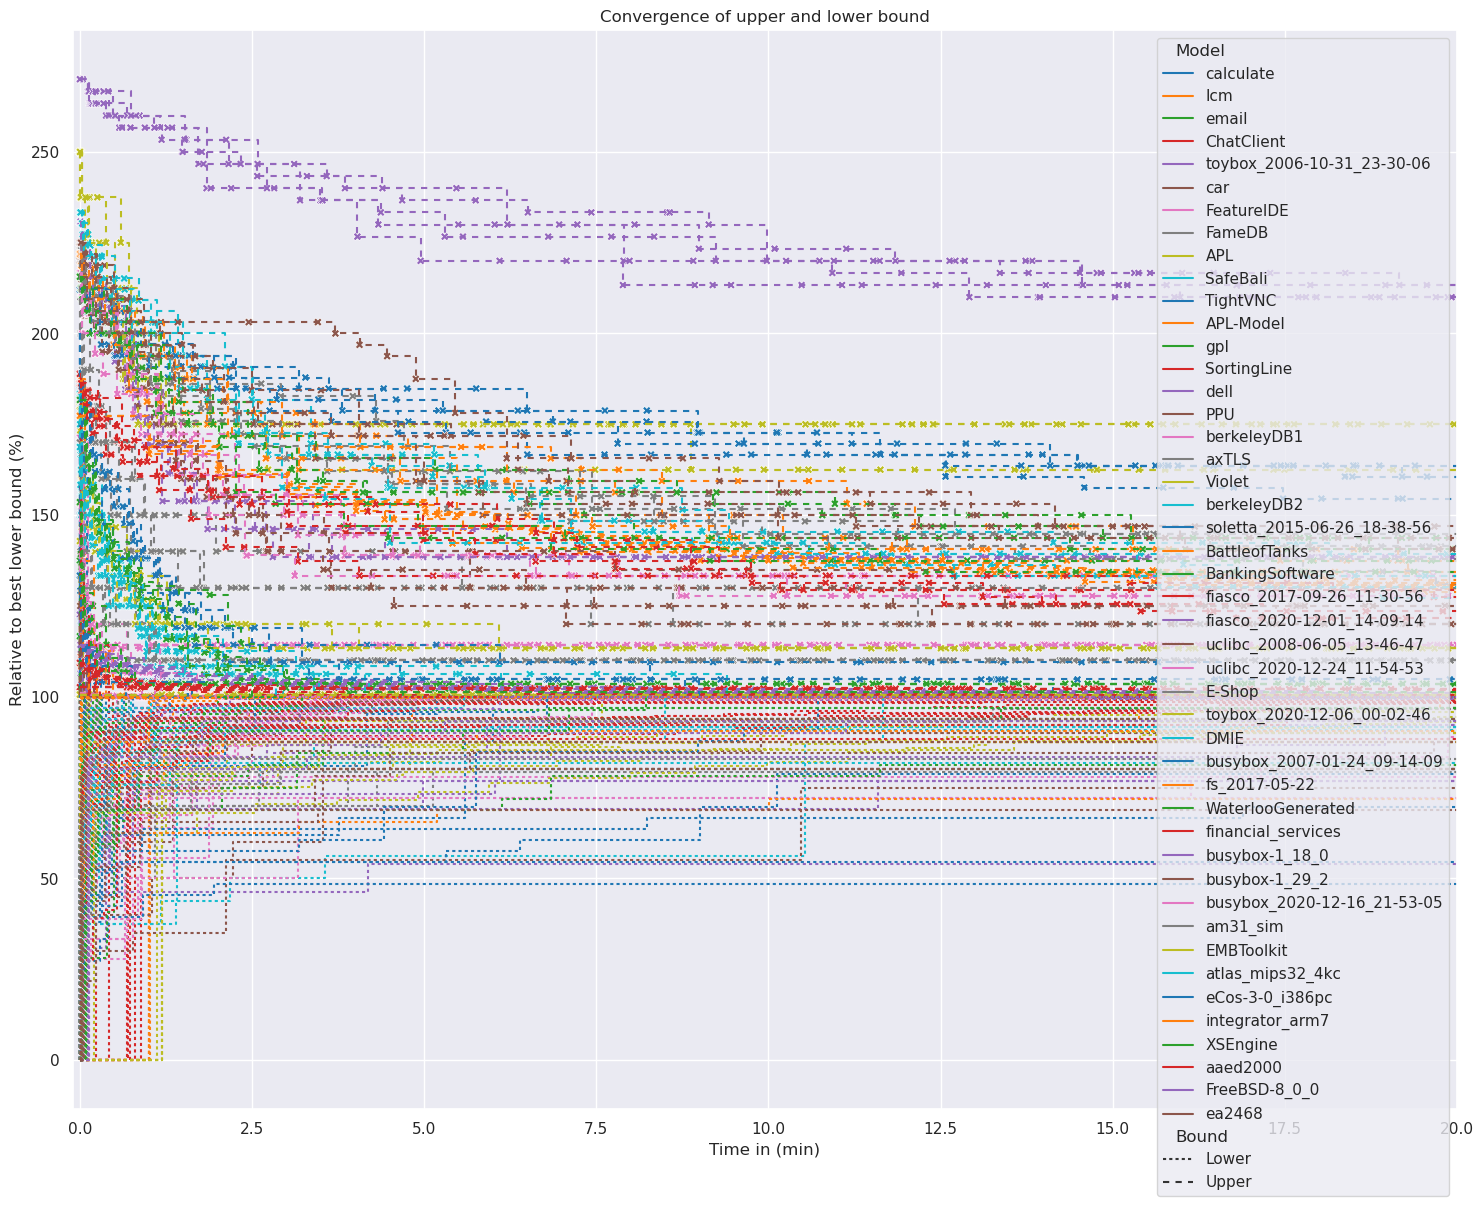

In [12]:
plt.figure(figsize=(15, 13))
plot_lb_ub_progress(t[t["instance"].isin(solved_instances)], plt.gca(), xmax=20)
plt.tight_layout()
plt.show()

### Every model with all its five runs.

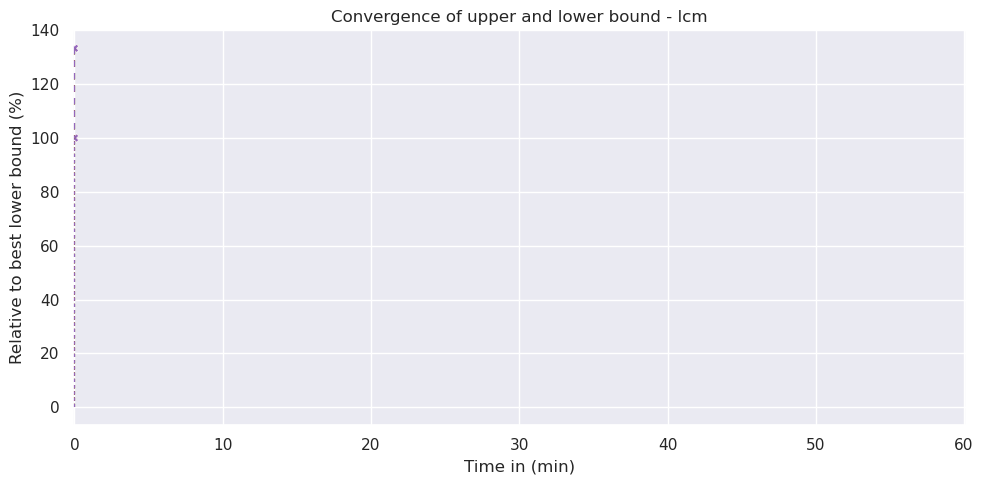

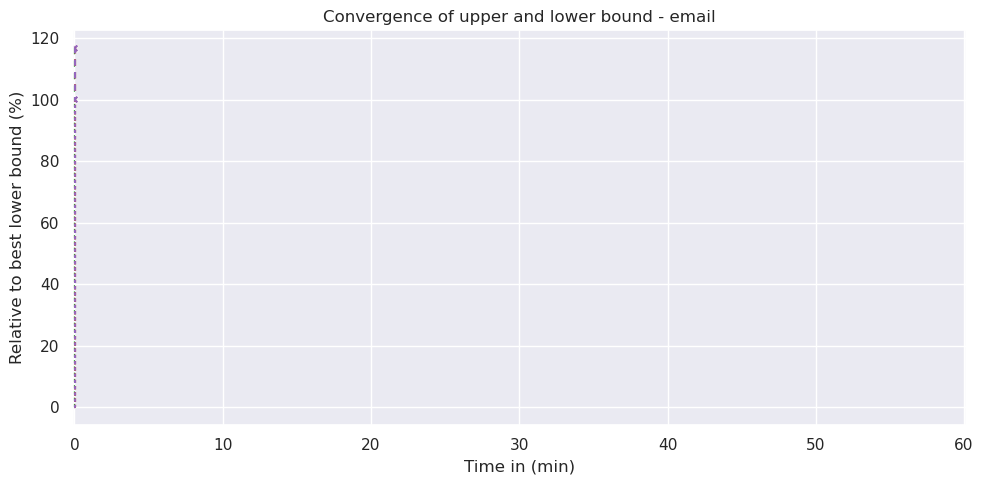

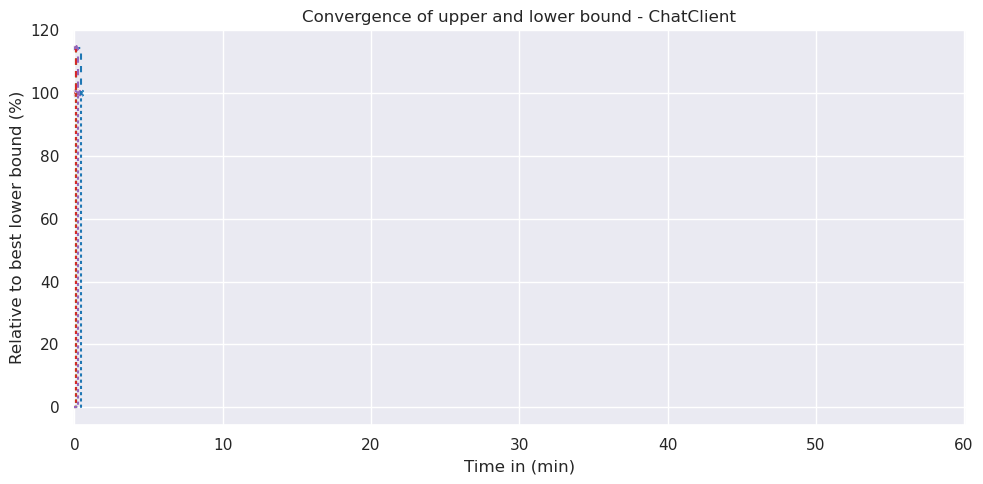

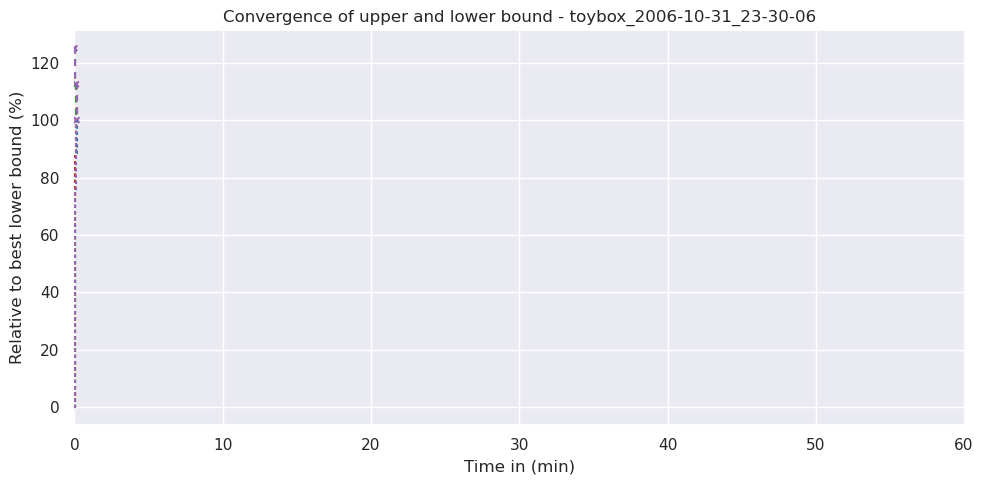

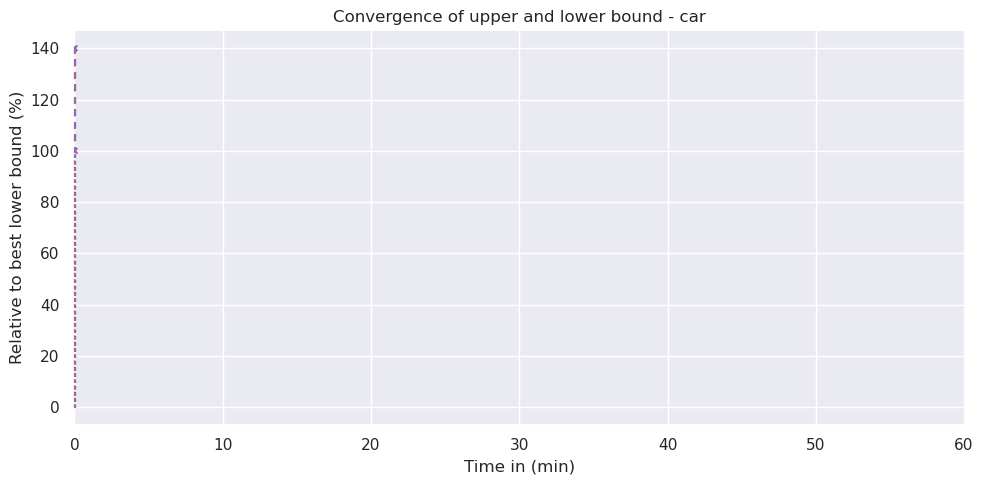

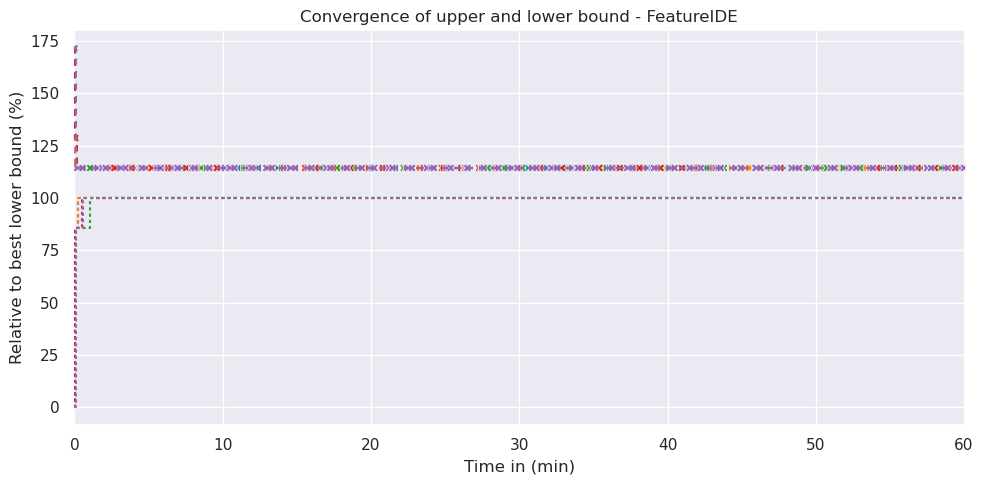

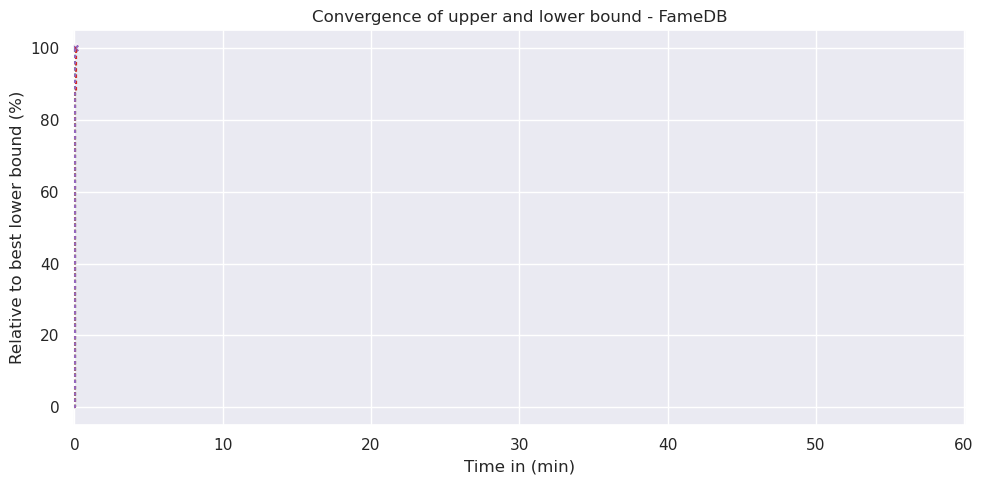

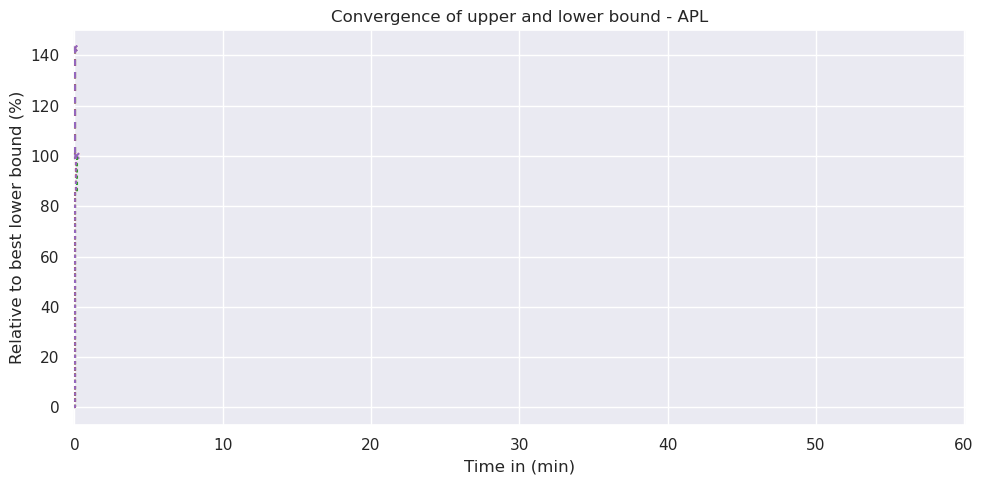

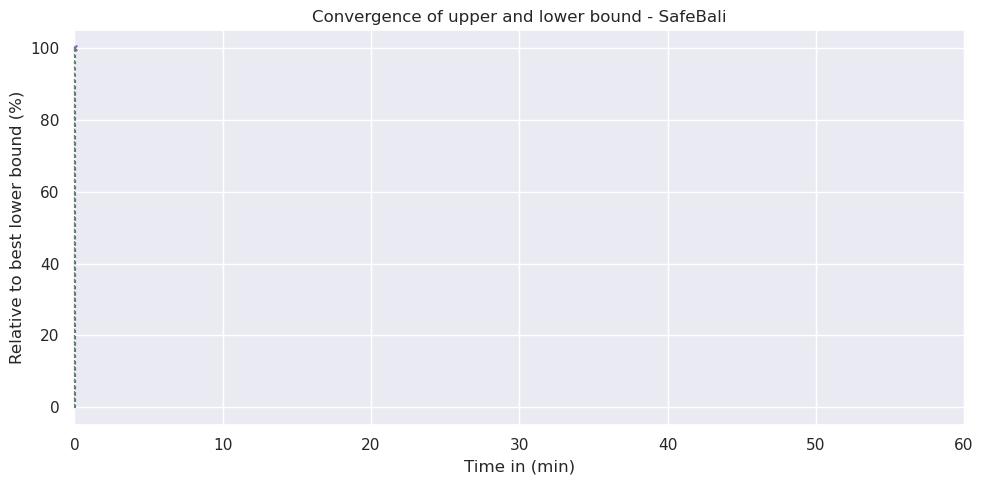

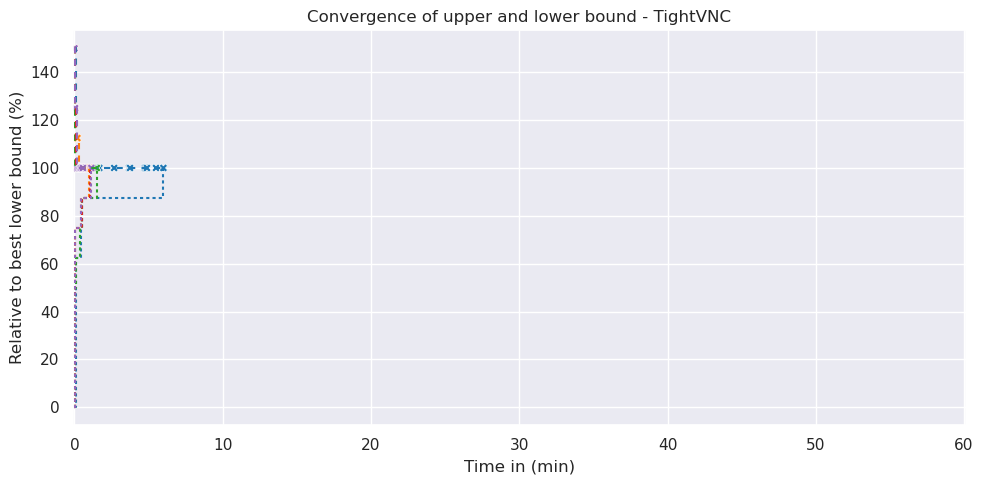

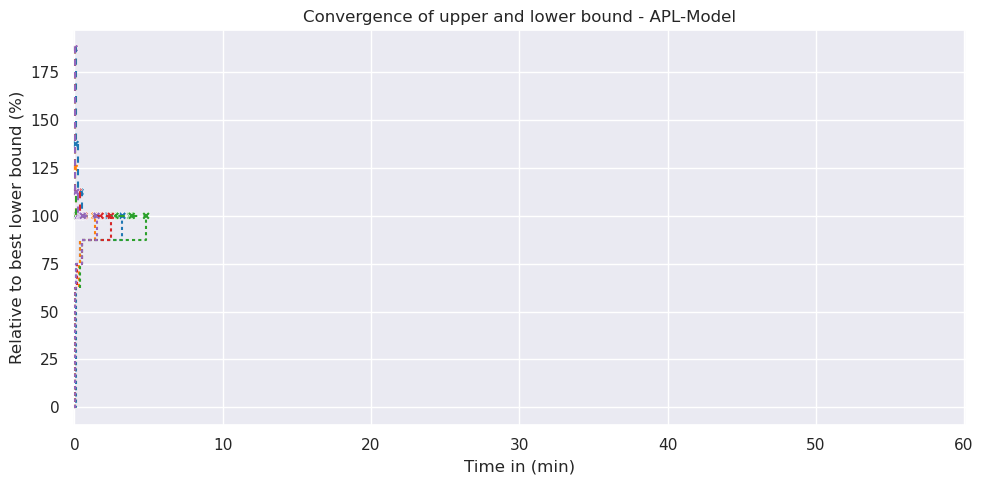

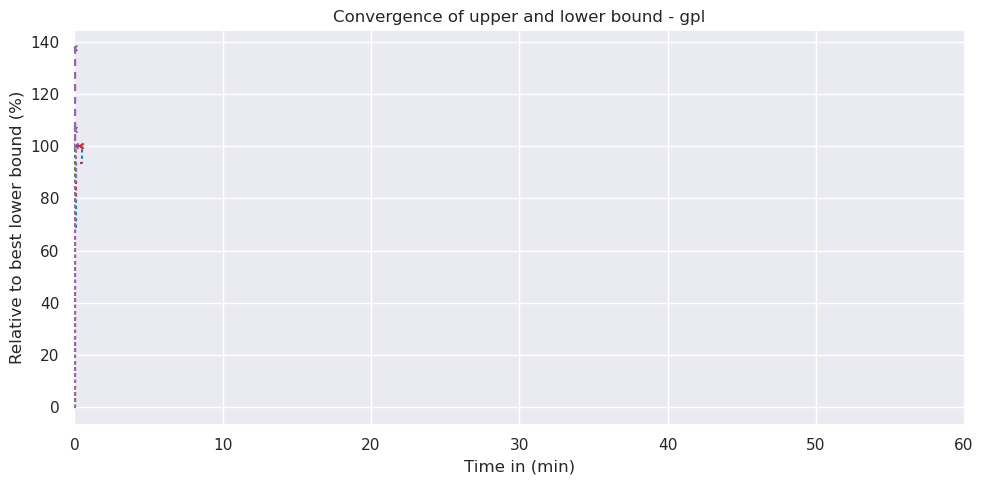

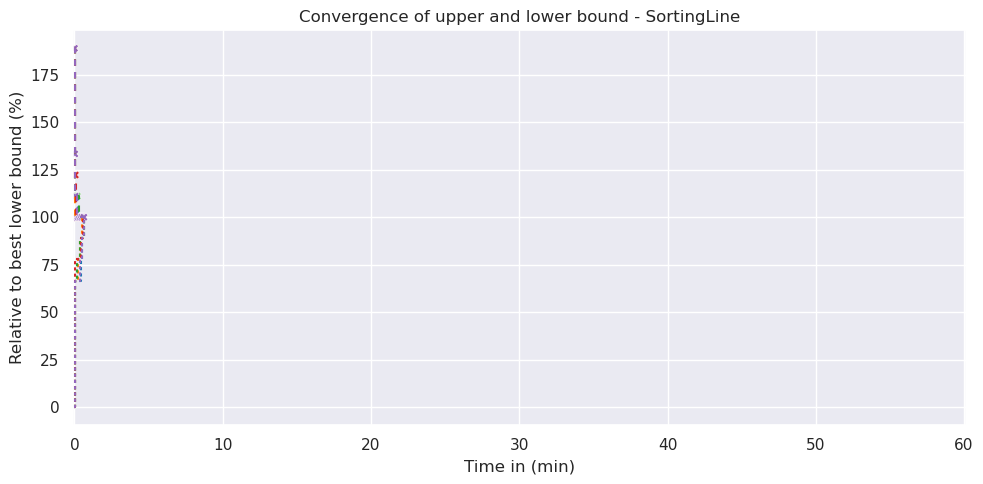

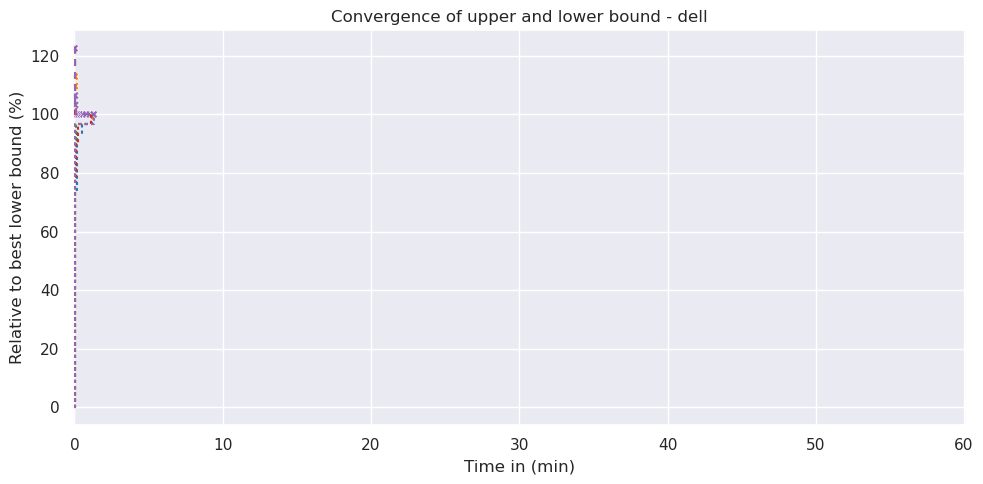

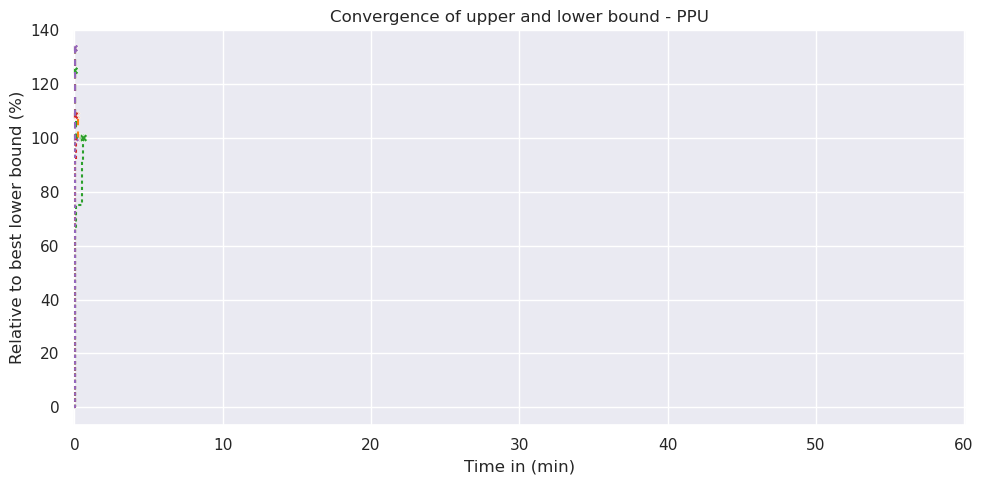

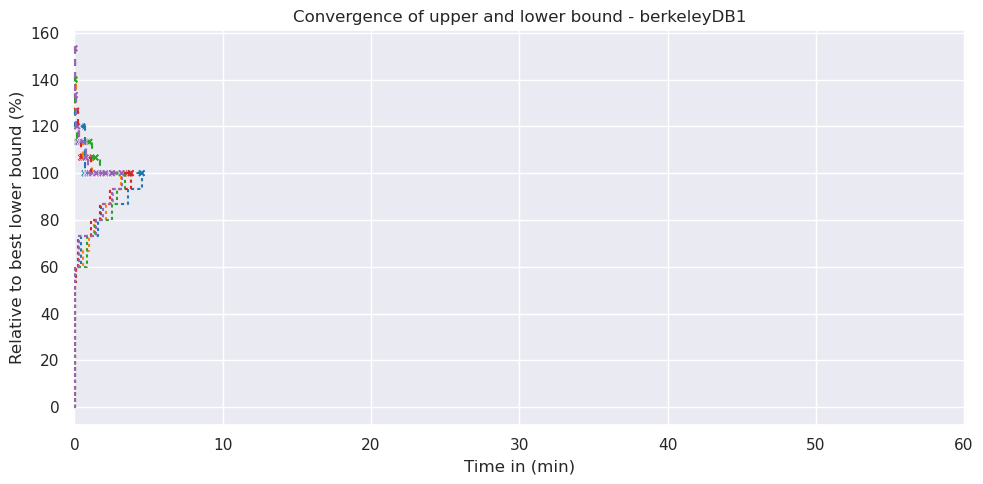

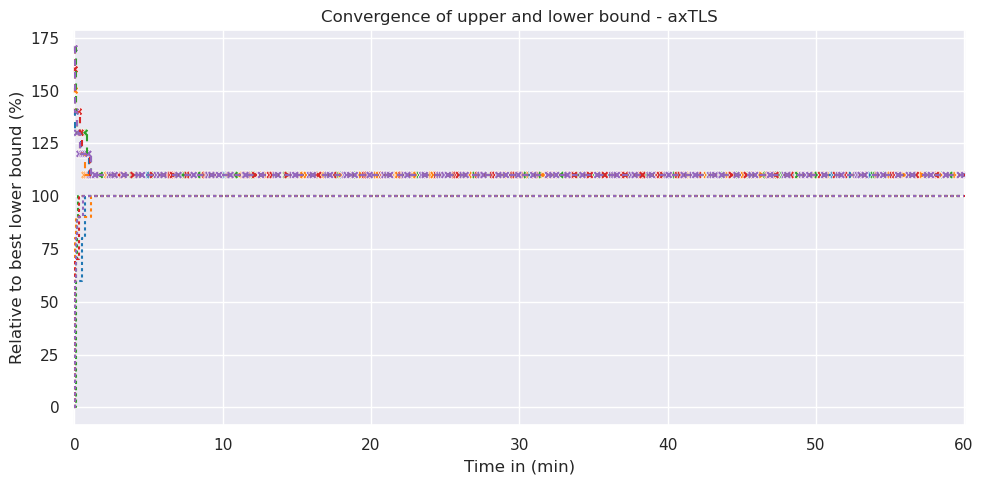

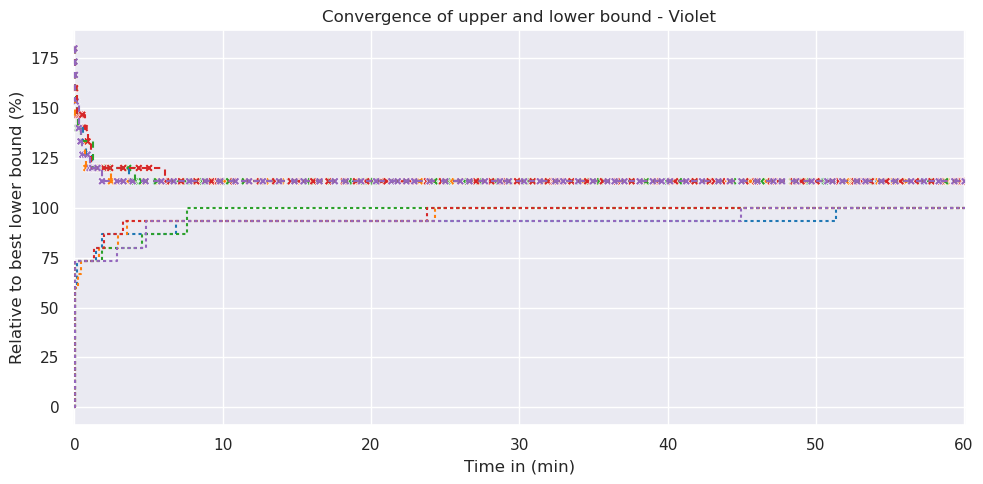

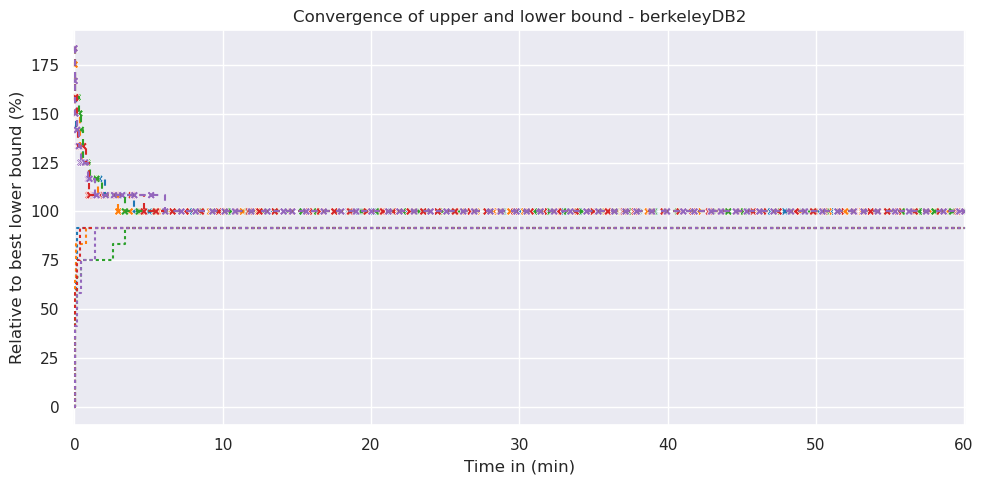

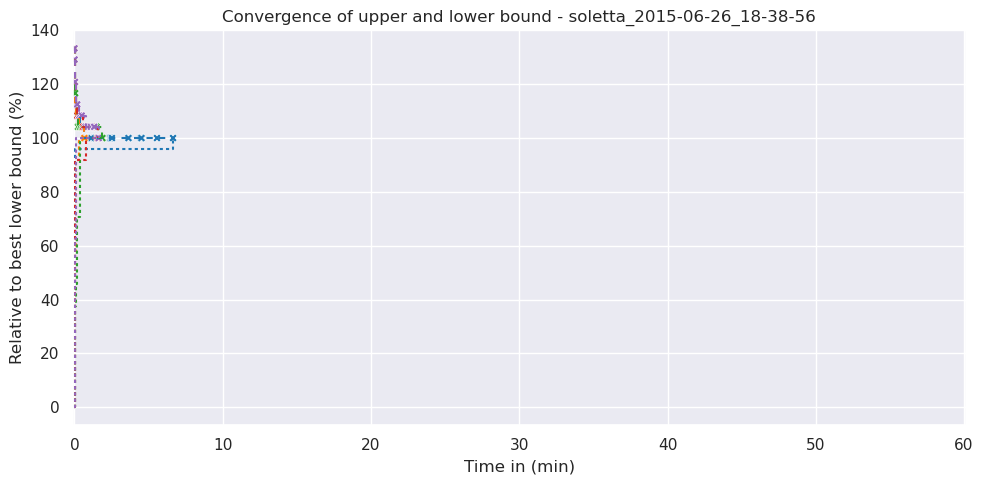

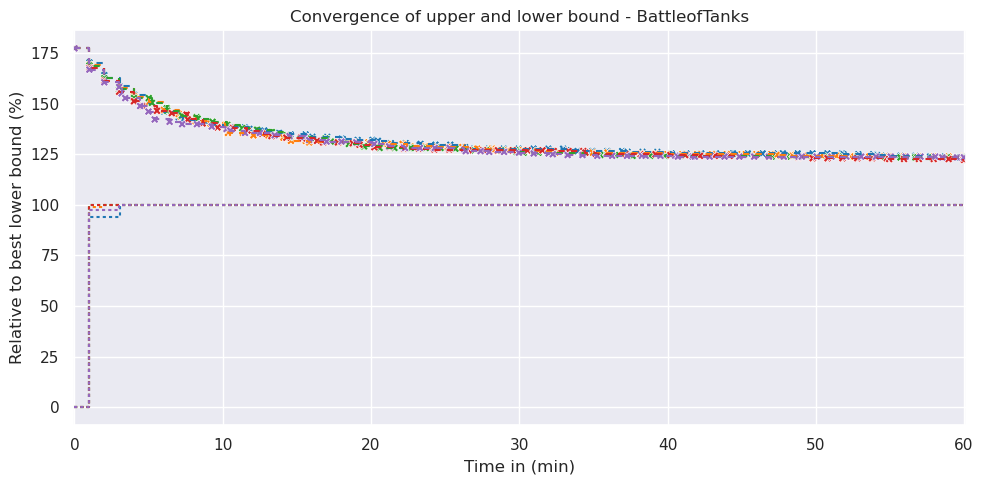

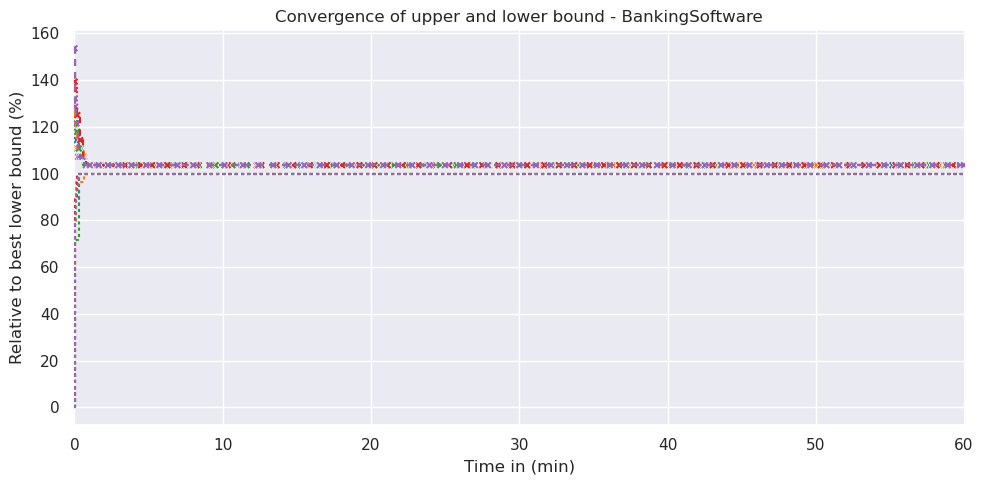

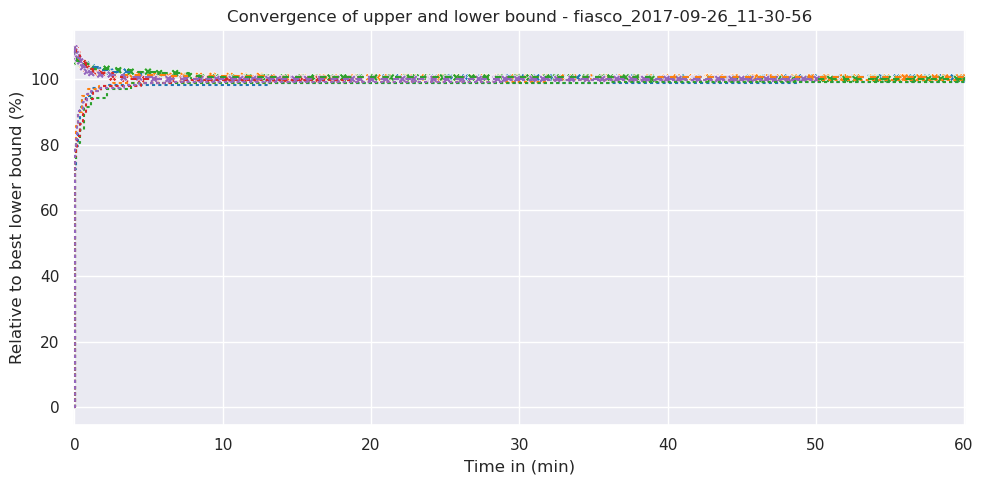

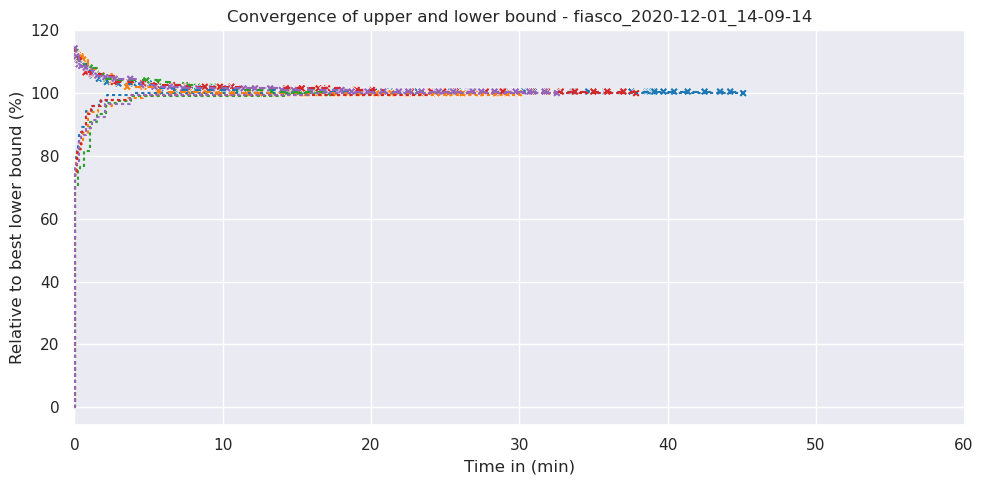

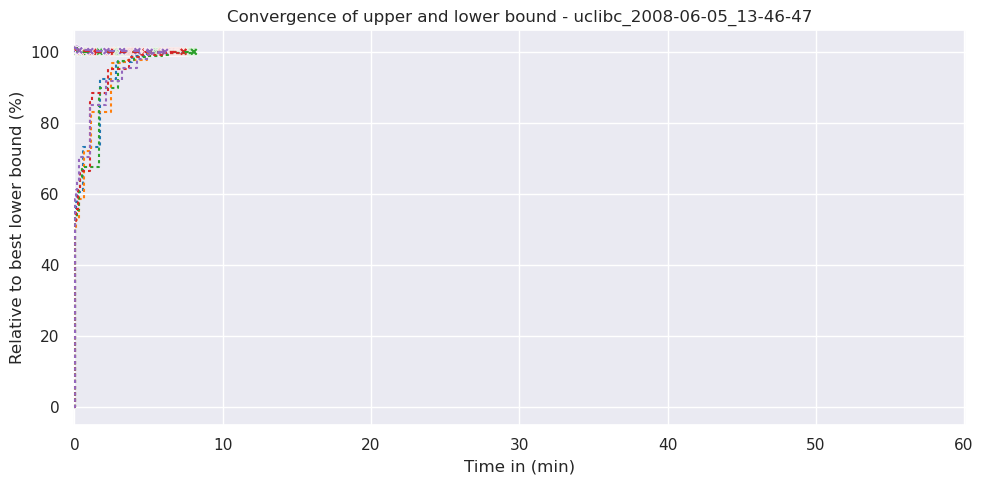

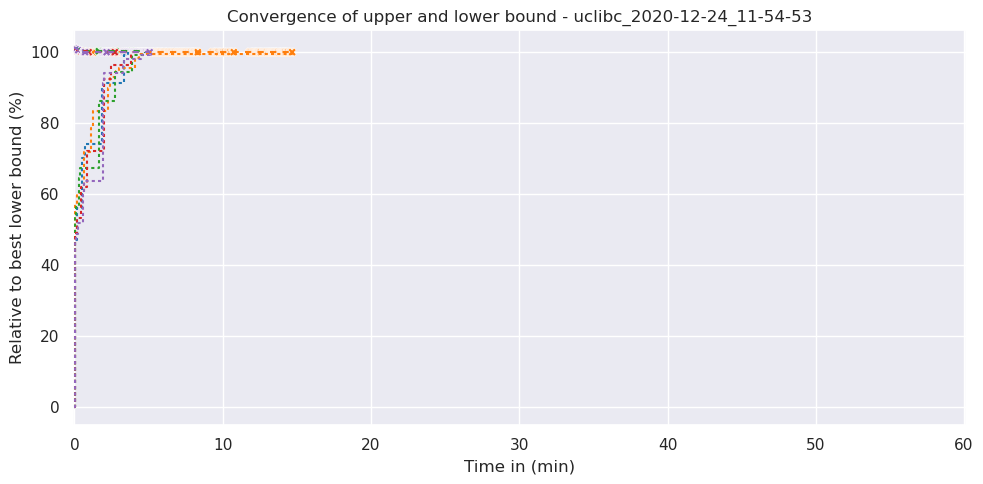

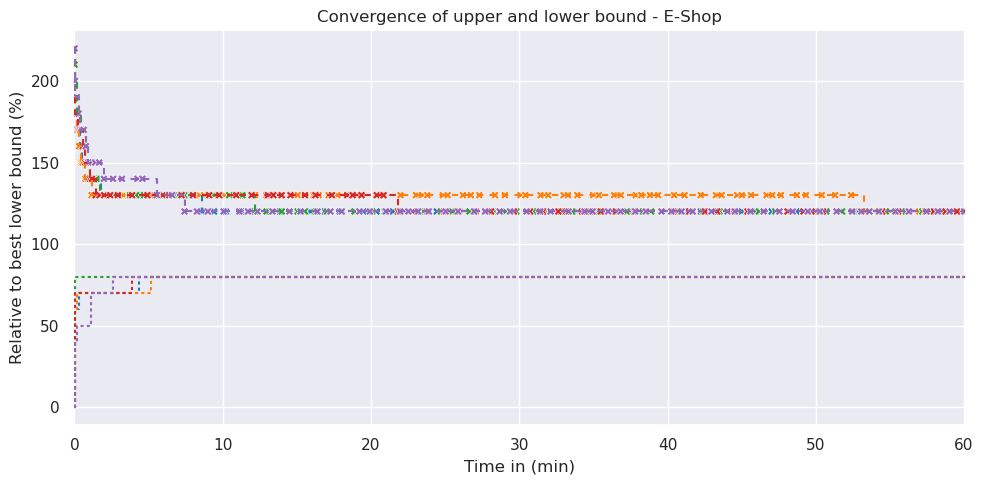

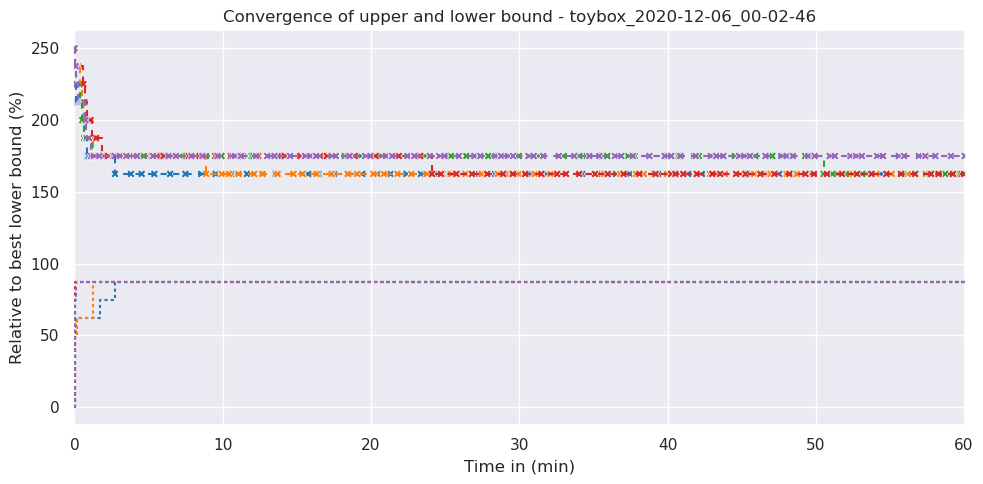

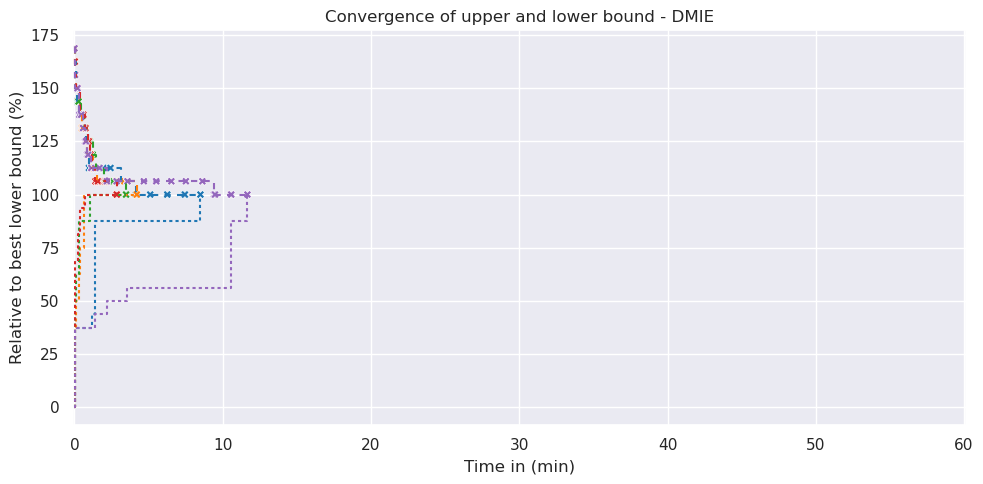

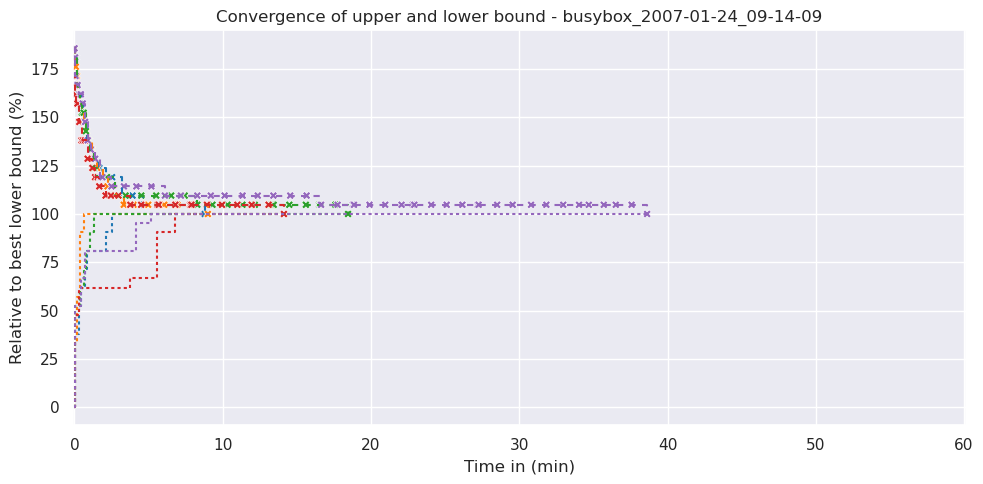

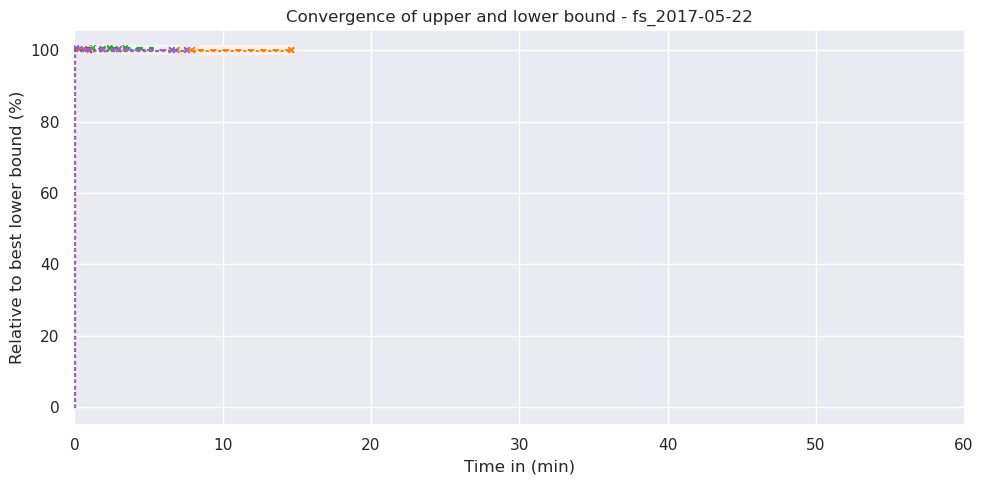

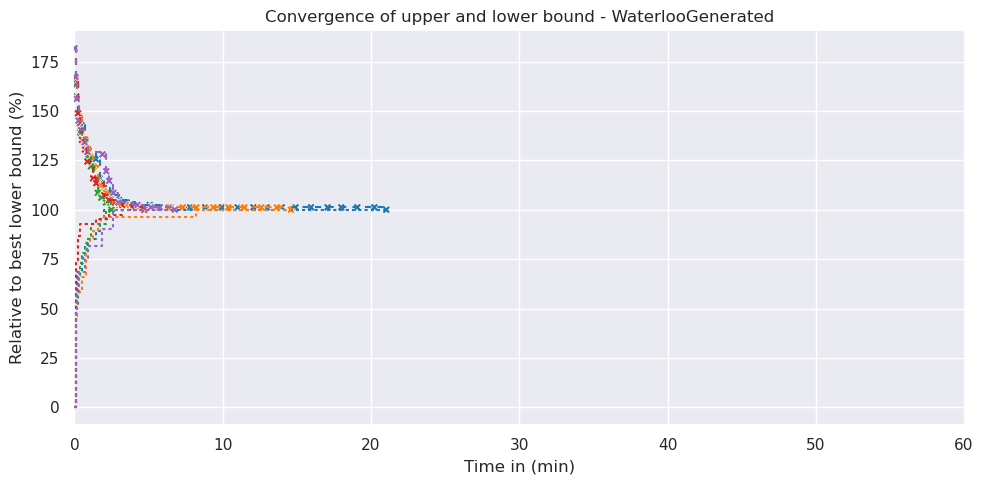

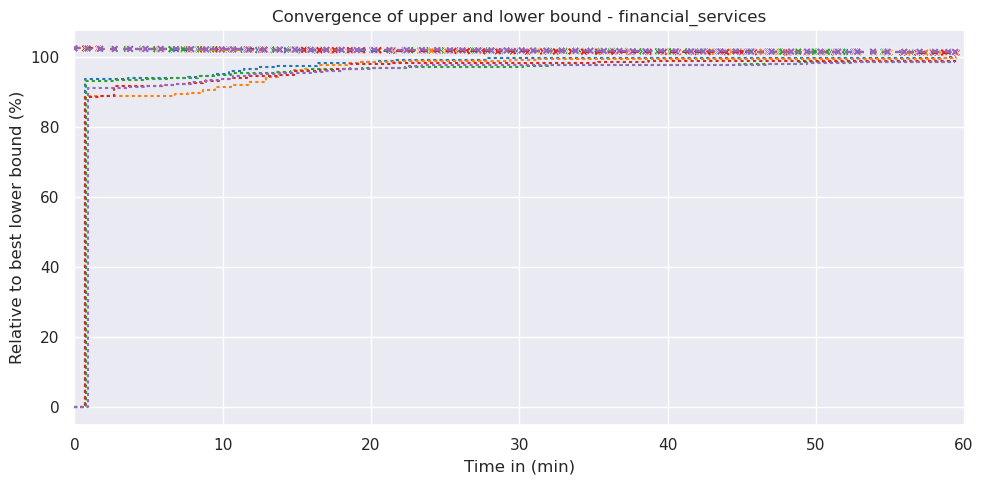

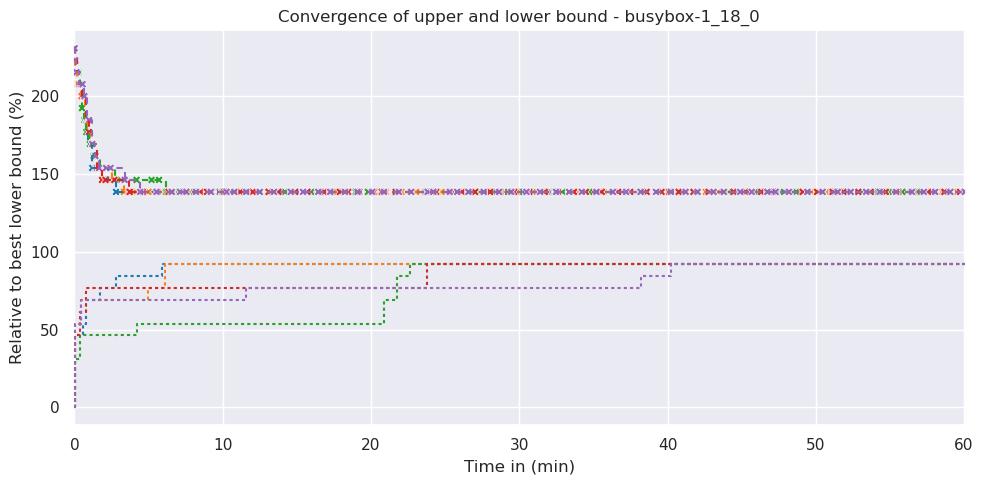

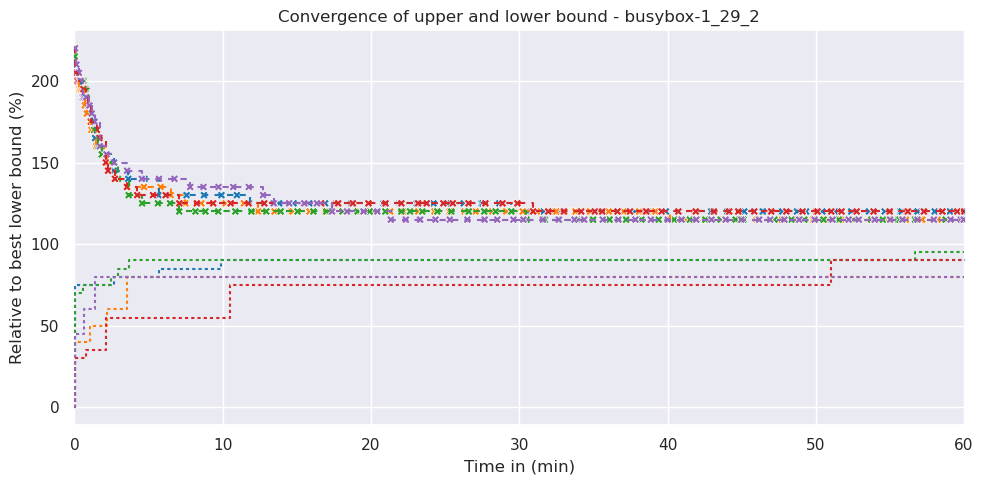

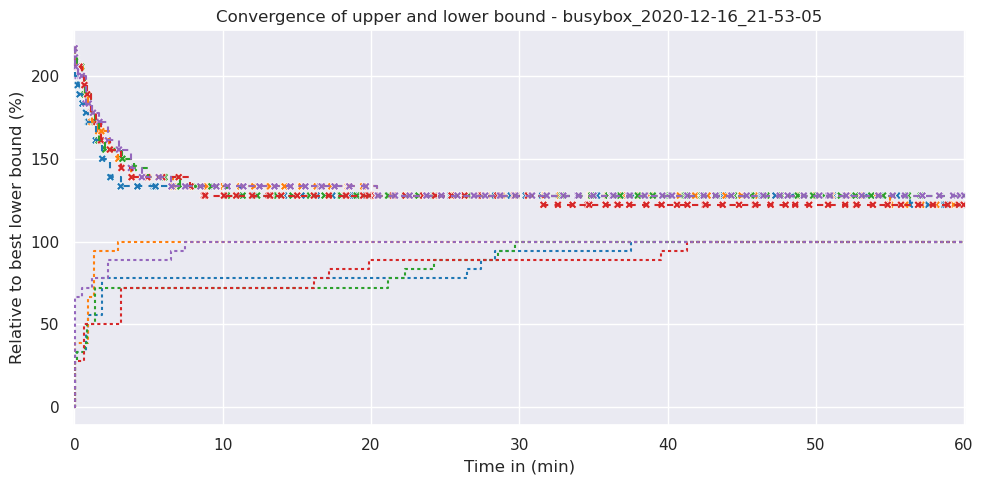

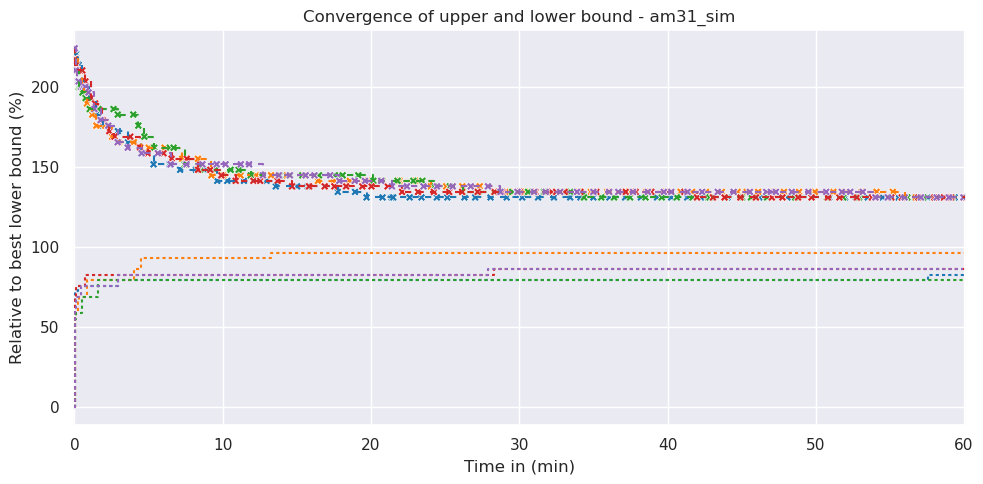

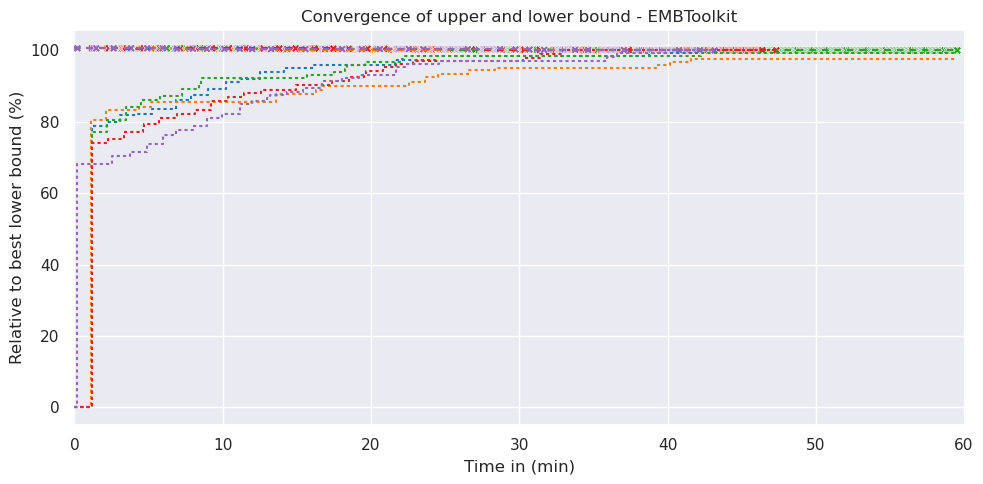

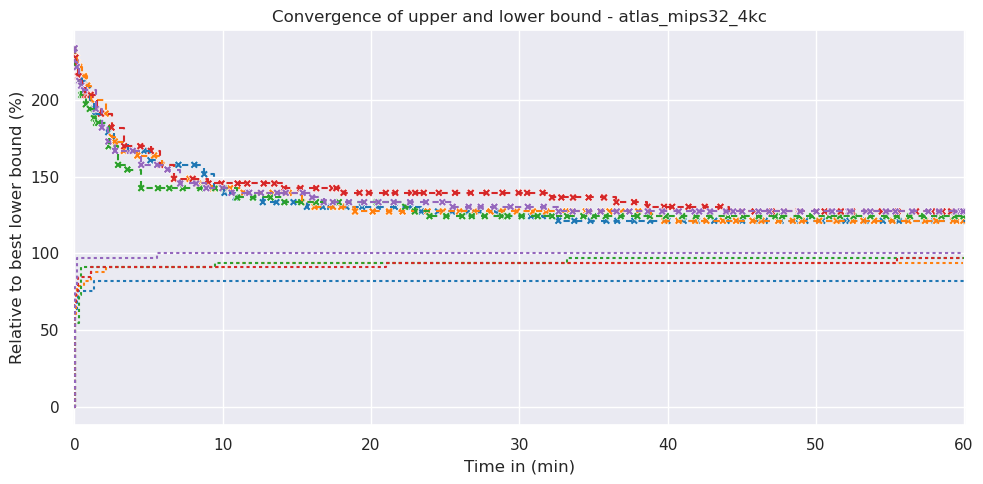

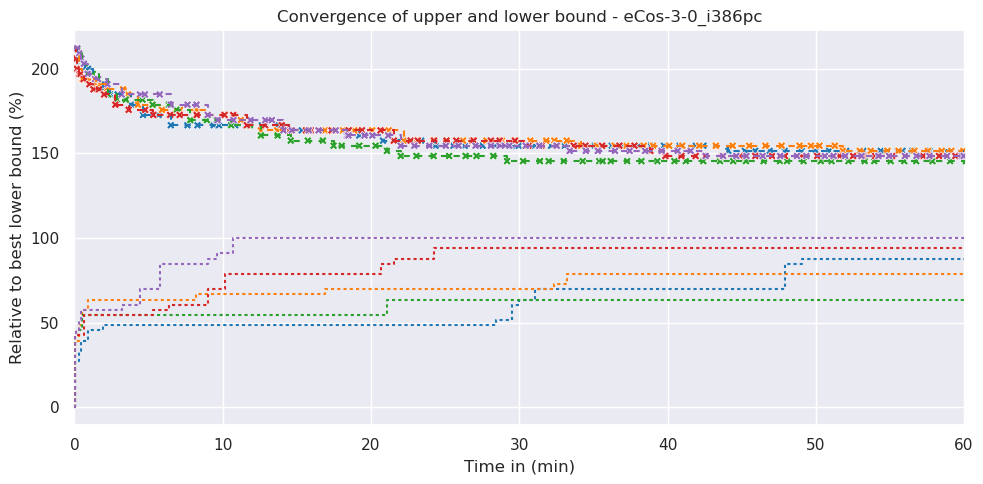

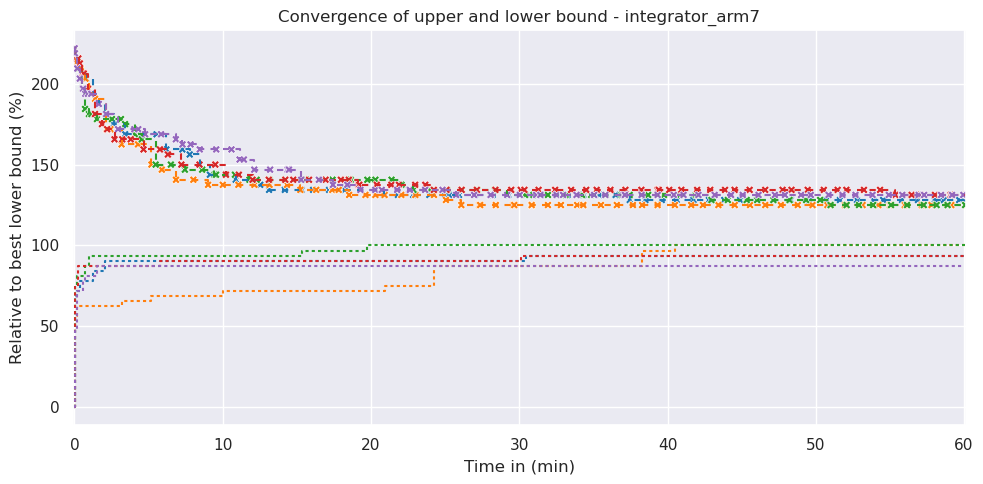

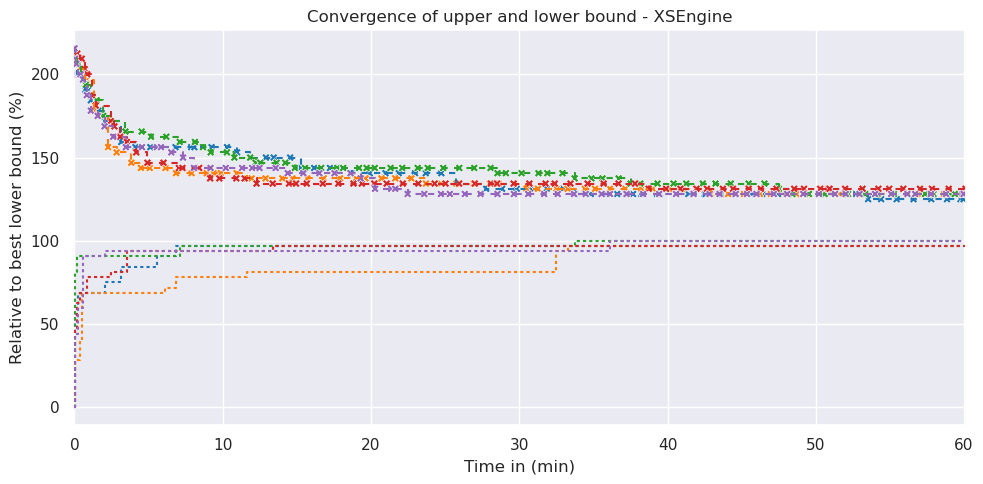

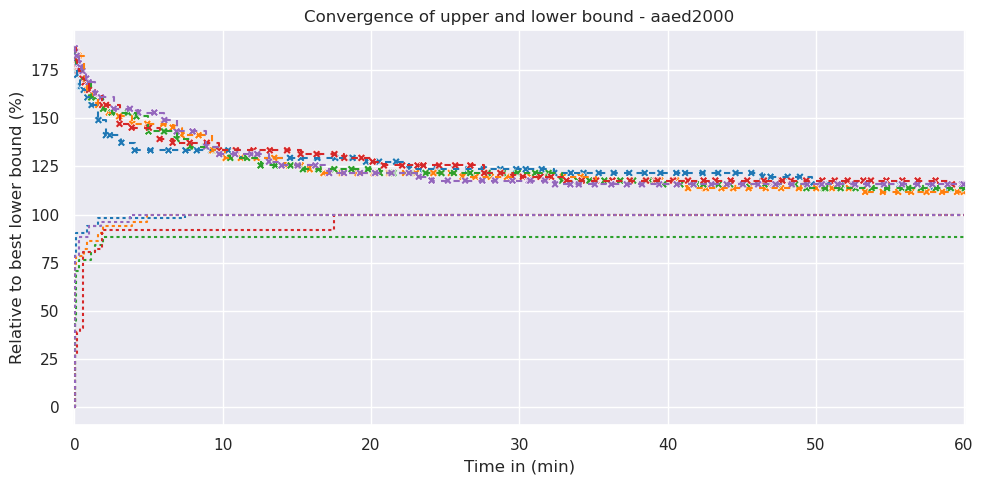

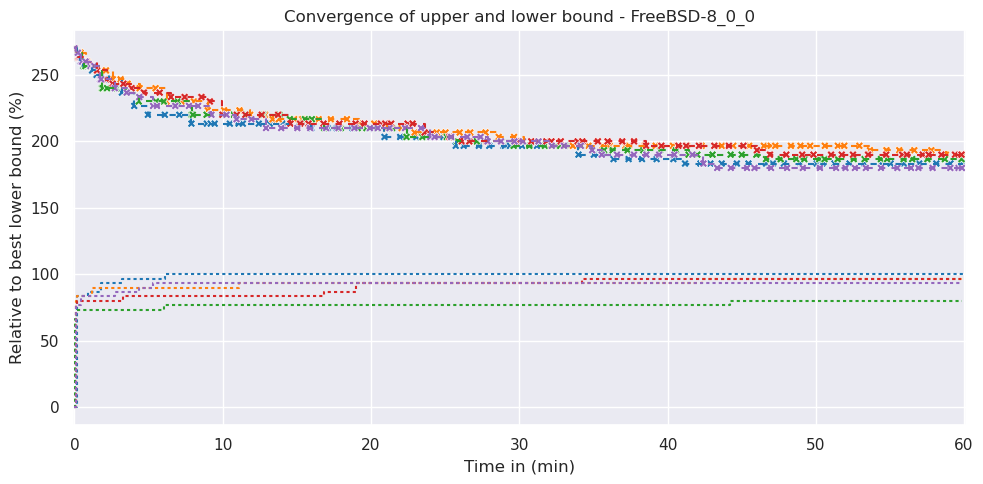

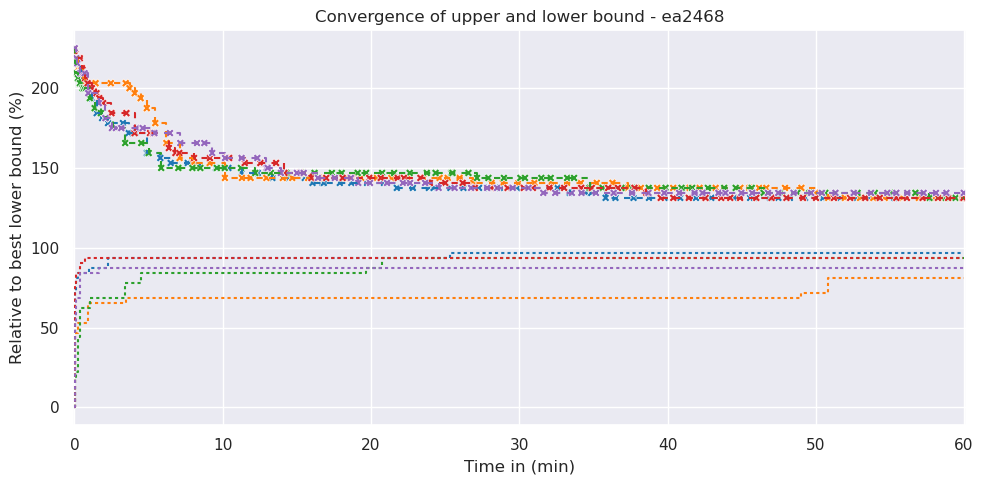

In [19]:
for i in range(1, len(solved_instances), 1):
    plt.figure(figsize=(10, 5))
    plot_lb_ub_progress(
        t[t["instance"].isin(solved_instances[i : i + 1])],
        plt.gca(),
        xmax=60.1,
        single_instance=True,
    )
    plt.tight_layout()
    plt.show()

## Looking onto a selection of instances in a single plot

In [14]:
ec = EventCollector()
selection = [
    "PPU",
    # small, optimal initial sample, no improvement, reached lower bound, progress within seconds + largest system for which an existing sampling algorithm is optimal
    "axTLS",
    # small, bad initial sample, large improvement, tight lower bound, progress for 0/1 min + smallest system that we cannot optimally solve
    "berkeleyDB2",
    # small, bad initial sample, large improvement, reached lower bound, progress for 6/3 min + one of the most significant improvements (43% + optimal afterwards)
    "fs_2017-05-22",
    # medium, good initial sample, small improvement, tight lower bound, progress for 0/10 min + smallest improvement (near-optimal sample still improved)
    "busybox_2020-12-16_21-53-05",
    # medium, bad initial sample, improvement over ~6 minutes, quick progress on lb.
    "FreeBSD-8_0_0"
    # medium, bad initial sample, large improvement, far lower bound, progress for 15/15 min + system with the largest remaining gap between LB=30 and sample=59 (almost 100%)
]
data[data["instance_name"].isin(selection)].drop_duplicates(
    subset=["instance_name"]
).sort_values(by=["num_vars", "num_clauses"]).apply(ec, axis=1)
t_selected = pd.DataFrame(ec.events)
t_selected["instance"] = t_selected["instance"].apply(lambda s: s[:15])

num_vars                                                                    52
num_clauses                                                                109
baseline_alg                                                              YASA
baseline_alg_conf                                                   t2_m1_null
runtime_baseline                                                          0.23
baseline_sample_size                                                        16
path_to_baseline_sample                2023-03-01_13-51-03/16_1_7_4_sample.csv
parameters                   {'func': 'run_samplns', 'args': {'instance_nam...
instance_name                                                              PPU
lower_bound                                                                 12
upper_bound                                                                 12
iteration_info               [{'nbrhd_tuples': 177, 'nbrhd_confs': 11, 'ite...
time_used_by_yasa                                   

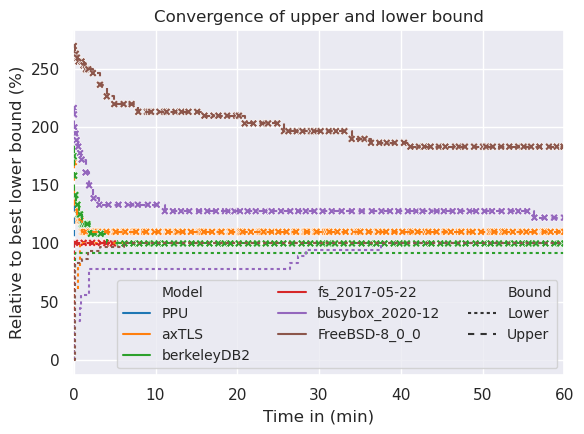

In [15]:
plt.figure(figsize=(6, 4.5))
plot_lb_ub_progress(t_selected, plt.gca(), xmax=60)
plt.legend(ncols=3, loc="lower right", prop={"size": 10})
plt.tight_layout()
plt.savefig("./plots/01_12_convergence_of_selected_models.pdf")
plt.show()

## Time of last change

To get a better grasp of the necessary time.

In [16]:
time_until_last_change = (
    t[t["final"] & (t["instance"].isin(solved_instances))]
    .groupby(["instance", "path", "type"])[["time"]]
    .min()
    .reset_index()
    .groupby(["instance", "type"])[["time"]]
    .mean()
)
time_until_last_change

time
instance                   type            
APL                        Lower   0.129859
                           Upper   0.034728
APL-Model                  Lower   2.672362
                           Upper   0.271153
BankingSoftware            Lower   0.341709
...                                     ...
toybox_2020-12-06_00-02-46 Upper  17.471260
uclibc_2008-06-05_13-46-47 Lower   7.260448
                           Upper   2.466513
uclibc_2020-12-24_11-54-53 Lower   6.381946
                           Upper   1.567767

[92 rows x 1 columns]

In [17]:
(time_until_last_change.groupby("instance")[["time"]].max() < 3).sum()

time    19
dtype: int64

In [18]:
time_until_last_change.reset_index().groupby("type")[["time"]].mean()

time
type            
Lower  10.327535
Upper  15.120193